In [2]:
# Dependencies and Setup
import os
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy.stats import linregress

# Data file paths
county_2015_path = "../Output/2015_cleaned_all_county.csv"
state_2015_path = "../Output/2015_cleaned_state.csv"
county_2017_path = "../Output/2017_cleaned_all_county.csv"
state_2017_path = "../Output/2017_cleaned_state.csv"

# Read 2015 and 2017 county and state CSVs
county_2015 = pd.read_csv(county_2015_path)
state_2015 = pd.read_csv(state_2015_path)
county_2017 = pd.read_csv(county_2017_path)
state_2017 = pd.read_csv(state_2017_path)

In [3]:
# Display State 2015
state_2015.head()

,State,TotalPop,Men,Women,Hispanic,White,Black,Native,Asian,Pacific,...,OtherTrans,WorkatHome,MeanCommute,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Poverty,ChildPoverty,Unemployment
0,Alabama,4830620,2341093,2489527,193159,3204658,1270556,22007,59324,1089,...,20994,56260,25,1583312,329430,105863,3715,910480,1318475,454437
1,Alaska,733375,384160,349215,47860,457438,23611,98381,42323,8638,...,19750,16083,10,240061,88175,22190,634,74612,99617,61930
2,Arizona,6641928,3299088,3342840,2015055,3751927,263011,265835,193799,11587,...,77252,156279,21,2230882,412325,166404,5502,1210351,1724490,603924
3,Arkansas,2958208,1451913,1506295,203216,2177095,456609,16531,39968,6628,...,15580,40259,22,969630,205337,78614,2406,571519,821223,231142
4,California,38421464,19087135,19334329,14746502,14878698,2157932,144676,5192680,133245,...,437377,917120,24,13403787,2381720,1434085,34099,6260461,8451647,3845611


In [4]:
# Creating 2015 Citizen Poverty DF 
citpov_15_state = state_2015[["State","TotalPop", "VotingAgeCitizen", "Poverty", "IncomePerCap"]]
citpov_15_state.head()
state_2015_citpov = citpov_15_state.copy()
state_2015_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap
0,Alabama,4830620,3620994,910480,20780
1,Alaska,733375,523946,74612,30332
2,Arizona,6641928,4526594,1210351,21052
3,Arkansas,2958208,2164083,571519,20072
4,California,38421464,24280349,6260461,27902


In [12]:
# Generate new DF for 2015 State to add new columns: Poverty (%), Voting Age Citizen (%), Citizen Poverty Difference (%)
pov_tpop_prcnt_state_15 = (state_2015_citpov["Poverty"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["Poverty(%)"] = pov_tpop_prcnt_state_15
cit_tpop_prcnt_state_15 = (state_2015_citpov["VotingAgeCitizen"] / state_2015_citpov["TotalPop"]) * 100
state_2015_citpov["VotingAgeCitizen(%)"] = cit_tpop_prcnt_state_15
citpov_diff_15 = state_2015_citpov["VotingAgeCitizen(%)"] - state_2015_citpov["Poverty(%)"]
state_2015_citpov["CitPovDiff(%)"] = citpov_diff_15
state_2015_citpov.head()

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
0,Alabama,4830620,3620994,910480,20780,18.848098,74.959198,56.111100
1,Alaska,733375,523946,74612,30332,10.173786,71.443123,61.269337
2,Arizona,6641928,4526594,1210351,21052,18.222886,68.151808,49.928921
3,Arkansas,2958208,2164083,571519,20072,19.319771,73.155201,53.835430
4,California,38421464,24280349,6260461,27902,16.294176,63.194752,46.900576


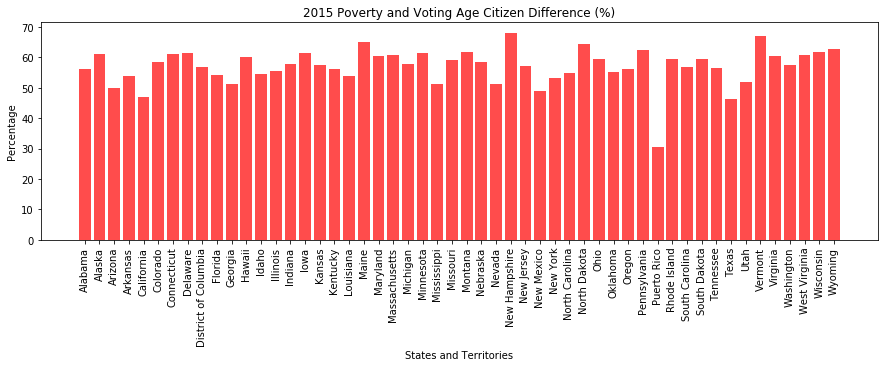

In [9]:
# Bar plot of State 2015 Poverty and Voting Age Citizen differerence (%)
citpovdiff15 = state_2015_citpov["CitPovDiff(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.bar(state_15, citpovdiff15, color='r', alpha=0.7, align="center")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty and Voting Age Citizen Difference (%)")
plt.show()

In [16]:
# Lowest poverty % 2015
lowest_pov_15 = state_2015_citpov.nsmallest(10, "Poverty(%)")
lowest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,31810,8.926968,77.037398,68.110430
20,Maryland,5930538,4182241,594311,33073,10.021199,70.520432,60.499233
1,Alaska,733375,523946,74612,30332,10.173786,71.443123,61.269337
6,Connecticut,3593222,2574178,377780,37025,10.513684,71.639826,61.126142
30,New Jersey,8904413,6053893,964839,36084,10.835515,67.987559,57.152044
11,Hawaii,1406299,1001729,157965,31892,11.232675,71.231580,59.998905
23,Minnesota,5419171,3950807,612737,27610,11.306840,72.904269,61.597429
34,North Dakota,721640,546486,82741,31900,11.465689,75.728341,64.262652
46,Vermont,626604,493124,72234,28487,11.527855,78.697870,67.170015
51,Wyoming,579679,430026,66992,29223,11.556741,74.183471,62.626730


In [17]:
# Highest poverty % 2015
highest_pov_15 = state_2015_citpov.nlargest(10, "Poverty(%)")
highest_pov_15

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3583073,2726223,1631029,9617,45.520395,76.086170,30.565774
24,Mississippi,2988081,2210424,675977,18805,22.622446,73.974701,51.352256
31,New Mexico,2084117,1457632,438533,21789,21.041669,69.940027,48.898358
18,Louisiana,4625253,3410634,916437,22064,19.813770,73.739404,53.925634
3,Arkansas,2958208,2164083,571519,20072,19.319771,73.155201,53.835430
17,Kentucky,4397353,3297108,831972,20663,18.919837,74.979380,56.059543
0,Alabama,4830620,3620994,910480,20780,18.848098,74.959198,56.111100
10,Georgia,10006693,6978660,1848836,20566,18.475994,69.739923,51.263929
2,Arizona,6641928,4526594,1210351,21052,18.222886,68.151808,49.928921
49,West Virginia,1851420,1455848,333578,21710,18.017414,78.634129,60.616716


In [18]:
# Lowest Voting Age Citizen % 2015
low_vac_15 = state_2015_citpov.nsmallest(10, "VotingAgeCitizen(%)")
low_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
4,California,38421464,24280349,6260461,27902,16.294176,63.194752,46.900576
44,Texas,26538614,16864962,4586120,23551,17.280933,63.548767,46.267834
45,Utah,2903379,1868008,358445,22552,12.345787,64.339103,51.993315
28,Nevada,2798636,1863799,432724,26317,15.461961,66.596692,51.134731
30,New Jersey,8904413,6053893,964839,36084,10.835515,67.987559,57.152044
2,Arizona,6641928,4526594,1210351,21052,18.222886,68.151808,49.928921
32,New York,19673174,13531404,3084011,28189,15.676225,68.780991,53.104766
10,Georgia,10006693,6978660,1848836,20566,18.475994,69.739923,51.263929
13,Illinois,12873761,8979999,1849183,25485,14.363969,69.754278,55.390309
12,Idaho,1616547,1130550,250122,21451,15.472609,69.936105,54.463495


In [15]:
# Highest Voting Age Citizen % 2015
high_vac_15 = state_2015_citpov.nlargest(10, "VotingAgeCitizen(%)")
high_vac_15

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
19,Maine,1329100,1048274,185317,25792,13.943044,78.870965,64.927921
46,Vermont,626604,493124,72234,28487,11.527855,78.697870,67.170015
49,West Virginia,1851420,1455848,333578,21710,18.017414,78.634129,60.616716
29,New Hampshire,1324201,1020130,118211,31810,8.926968,77.037398,68.110430
26,Montana,1014699,781250,154229,25020,15.199483,76.993276,61.793793
39,Puerto Rico,3583073,2726223,1631029,9617,45.520395,76.086170,30.565774
38,Pennsylvania,12779559,9710416,1724212,25952,13.491952,75.983968,62.492016
34,North Dakota,721640,546486,82741,31900,11.465689,75.728341,64.262652
35,Ohio,11575977,8709050,1827006,24467,15.782737,75.233823,59.451086
17,Kentucky,4397353,3297108,831972,20663,18.919837,74.979380,56.059543


In [10]:
# Compiled top 10 states in 2015 that had the smallest gap between poverty and voting age citizens
smallest_10_diff_15 = state_2015_citpov.nsmallest(10, "CitPovDiff(%)")
smallest_10_diff_15

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
39,Puerto Rico,3583073,2726223,1631029,9617,45.520395,76.086170,30.565774
44,Texas,26538614,16864962,4586120,23551,17.280933,63.548767,46.267834
4,California,38421464,24280349,6260461,27902,16.294176,63.194752,46.900576
31,New Mexico,2084117,1457632,438533,21789,21.041669,69.940027,48.898358
2,Arizona,6641928,4526594,1210351,21052,18.222886,68.151808,49.928921
28,Nevada,2798636,1863799,432724,26317,15.461961,66.596692,51.134731
10,Georgia,10006693,6978660,1848836,20566,18.475994,69.739923,51.263929
24,Mississippi,2988081,2210424,675977,18805,22.622446,73.974701,51.352256
45,Utah,2903379,1868008,358445,22552,12.345787,64.339103,51.993315
32,New York,19673174,13531404,3084011,28189,15.676225,68.780991,53.104766


In [13]:
# Compiled top 10 states in 2015 that had the largest gap between poverty and voting age citizens
largest_10_diff_15 = state_2015_citpov.nlargest(10, "CitPovDiff(%)")
largest_10_diff_15

,State,TotalPop,VotingAgeCitizen,Poverty,IncomePerCap,Poverty(%),VotingAgeCitizen(%),CitPovDiff(%)
29,New Hampshire,1324201,1020130,118211,31810,8.926968,77.037398,68.110430
46,Vermont,626604,493124,72234,28487,11.527855,78.697870,67.170015
19,Maine,1329100,1048274,185317,25792,13.943044,78.870965,64.927921
34,North Dakota,721640,546486,82741,31900,11.465689,75.728341,64.262652
51,Wyoming,579679,430026,66992,29223,11.556741,74.183471,62.626730
38,Pennsylvania,12779559,9710416,1724212,25952,13.491952,75.983968,62.492016
50,Wisconsin,5742117,4294321,744644,26250,12.968109,74.786372,61.818263
26,Montana,1014699,781250,154229,25020,15.199483,76.993276,61.793793
23,Minnesota,5419171,3950807,612737,27610,11.306840,72.904269,61.597429
7,Delaware,926454,681606,111662,28952,12.052622,73.571489,61.518867


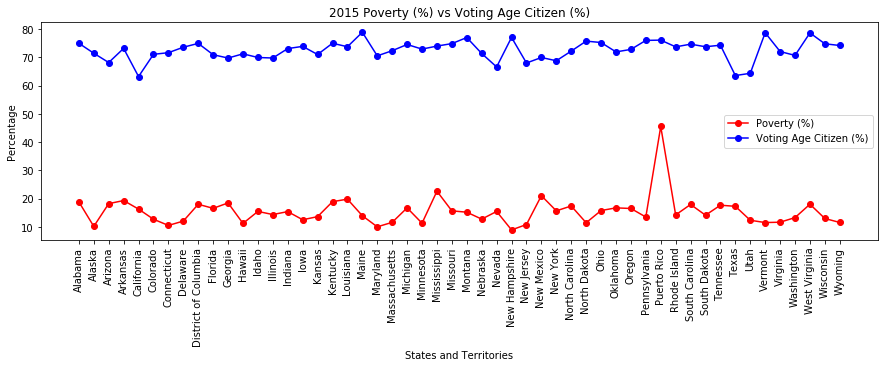

In [54]:
# Line plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2015 = state_2015_citpov["Poverty(%)"]
cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, pov_plt_2015, marker="o", color="red", label="Poverty (%)")
plt.plot(state_15, cit_plt_2015, marker="o", color="blue", label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

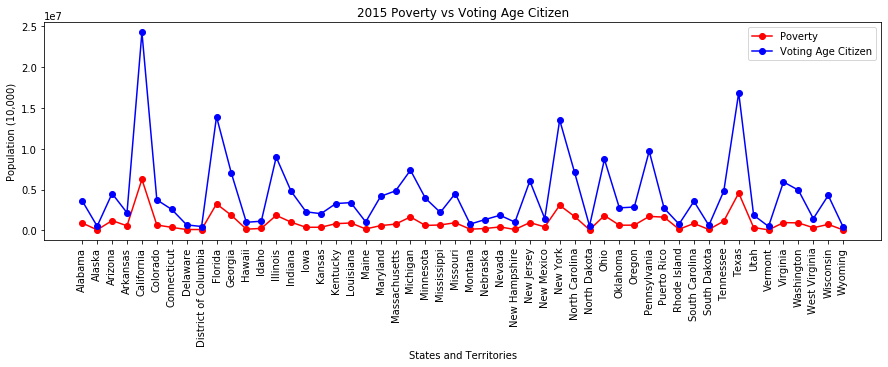

In [60]:
# Line plot of State 2015 Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2015 = state_2015_citpov["Poverty"]
citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.plot(state_15, povw_plt_2015, marker="o", color="red", label="Poverty")
plt.plot(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Population (10,000)")
plt.title("2015 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")

plt.show()

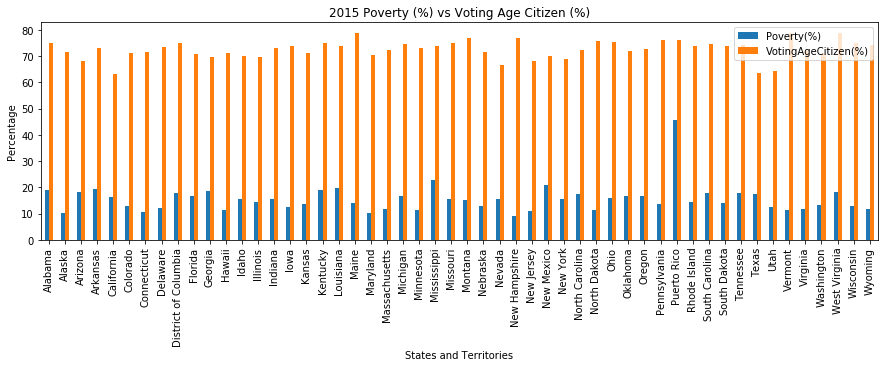

In [55]:
# Multibar plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2015 = state_2015_citpov["Poverty(%)"]
cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
state_15 = state_2015_citpov["State"]
multi_bar_15 = state_2015_citpov[["State", "Poverty(%)", "VotingAgeCitizen(%)"]].plot(kind="bar", figsize=(15,4))
multi_bar_15.set_xticklabels(state_15, rotation="vertical")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
plt.show()

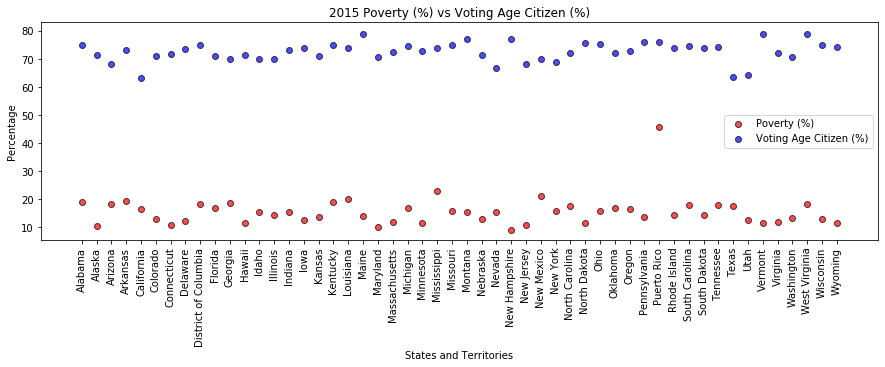

In [53]:
# Scatter plot of State 2015 Poverty (%) vs Voting Age Citizen (%)
pov_plt_2015 = state_2015_citpov["Poverty(%)"]
cit_plt_2015 = state_2015_citpov["VotingAgeCitizen(%)"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.scatter(state_15, pov_plt_2015, marker="o", facecolors="red", edgecolors="black", alpha=0.7, label="Poverty (%)")
plt.scatter(state_15, cit_plt_2015, marker="o", facecolors="blue", edgecolors="black", alpha=0.7, label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Percentage")
plt.title("2015 Poverty (%) vs Voting Age Citizen (%)")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")
plt.show()

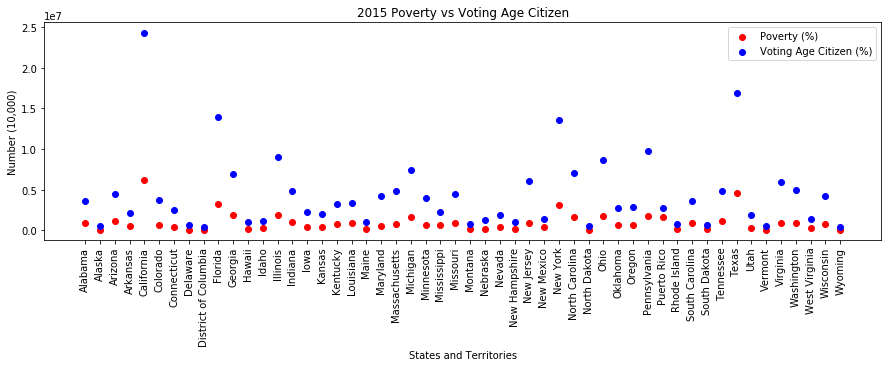

In [57]:
# Scatter plot of 2015 State Poverty (pop) vs Voting Age Citizen (pop)
povw_plt_2015 = state_2015_citpov["Poverty"]
citw_plt_2015 = state_2015_citpov["VotingAgeCitizen"]
state_15 = state_2015_citpov["State"]
plt.figure(figsize=(15, 4))
plt.scatter(state_15, povw_plt_2015, marker="o", color="red", label="Poverty (%)")
plt.scatter(state_15, citw_plt_2015, marker="o", color="blue", label="Voting Age Citizen (%)")
plt.legend(loc="best")
plt.xlabel("States and Territories")
plt.ylabel("Number (10,000)")
plt.title("2015 Poverty vs Voting Age Citizen")
tick_locations = [value for value in state_15]
plt.xticks(tick_locations, rotation="vertical")

plt.show()